<a href="https://colab.research.google.com/github/rpdieego/Employee-Absenteeism/blob/master/Employee_Absenteeism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 365 Data Science Bootcamp Project - Employee Absenteeism



# Step 1 - Defining the Problem

The human resources department of a company wants to know which were the most impactfull factors for the absence of their employees. Then, they decided to gather all the data from the registered absences and analize some features in order to understand what is the profile of the employee which is absent more frequently, based on social, health and professional factors.

The HR department would also like to find a way to create a threshold to classify if a employee is "being absent too much" or not based on this analysis.

This dataset is available as part of the course:  Complete Data Science Bootcamp, from 365 DataScience on the Udemy Platorm.

[365 DataScience on LinkedIn](https://www.linkedin.com/company/365datascience/)

**Goal** 

Our goal here is to perform a exploratory data analisys (EDA) and then run a logistic regression in order to enable the HR department to classify the absenteeism of their employees.


# Step 2 - Obtaining the Data

In [49]:
# import relevant libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics




# Opening the Dataframe using Pandas
url = 'https://raw.githubusercontent.com/rpdieego/Employee-Absenteeism/master/Absenteeism-data.csv'

df = pd.read_csv(url)

# Checking the dimensions of the Dataset

print("Dataset \n Variables:\t{}\n Inputs:\t{}".format(df.shape[1], df.shape[0]))

Dataset 
 Variables:	12
 Inputs:	700


# Section 3 - Exploratory Data Analysis

**Data Dictionary**


*   *ID* - Employee Identification;
*   *Reason for Absence* - Registered reason for the absence ( Reasons 1 - 21 are registered in the International Classification o Diseases (ICD), while Reasons 22 - 28 follow the internal classification of the company) :
  *   0 - Reason were not yet declared
  *   1 - Certain Infectious and parasitic diseases
  *   2 - Neoplasms
  *   3 - Diseases o thhe blood and blood-forming organs and certains disorders involving the immune mechanism
  *   4 - Endocrine, nutritional and metabolic diseases
  *   5 - Mental and ehavioural disorders
  *   6 - Diseases of the nervous system
  *   7 - Diseases of the eye and adnexa
  *   8 - Diseases of the ear and mastoid process
  *   9 - Diseases of the circulatory system
  *   10 - Diseases of the respiratory system
  *   11 - Diseases of the digestive system
  *   12 - Diseases of the skin and subcutaneous tissue
  *   13 - Diseases of the musculosketal system and connective tissue
  *   14 - Diseases of the genitourinary system
  *   15 - Pregnancy, childbbirth and the puerperium
  *   16 - Certain conditions originating in the perinatal period
  *   17 - Congenital malformations, deformations and chrosmosomal abnormalities
  *   18 - Symptos, signs and abnormal clinical and laboratory findings, not elsewhere classified
  *   19 - Injury, poisoning and certain other consequences of external causes
  *   20 - External causes of morbidity and mortality
  *   21 - Factors influencing health status and contact with health services
  *   22 - Patient follow-up
  *   23 - Medical Consultation
  *   24 - Blood Donation
  *   25 - Labboratory examination
  *   26 - Unjustified absence
  *   27 - Physiotherapy
  *   28 - Dental consultations
   
*   *Date* - Date of the registered absence;
*   *Transportation Expense* - Costs related to business travel such as fuel, parking and meals;
*   *Distance to Work* - Distance in kilometers from the employee`s house to the workplace;
*   *Age* - Employee`s age;
*   *Daily Work Load Average* - Employee`s averege daily work load measured in minutes;
*   *Body Mass Index* - Employee`s body mass index ( weight [kg] / height [cm] ² );
*   *Education* - Employee`s level of education;
  *   1 - High School
  *   2 - Graduate
  *   3 - Postgraduate
  *   4 - Master / Doctor Degree
*   *Children* - Number of children in the family;
*   *Pets* - Numebr of pets in the family;
*   *Absenteeism Time in Hours* - How many hours the employee were absent on that working day;





In [2]:
#Checking the type of each variable

quantitative = [f for f in df.columns if df.dtypes[f] != 'object']
quantitative.remove('ID')
qualitative = [f for f in df.columns if df.dtypes[f] == 'object']

print("Quantitative Variables: \t\n{}".format(quantitative))
print("\n")
print("Qualitative Variables: \t\n{}".format(qualitative))

Quantitative Variables: 	
['Reason for Absence', 'Transportation Expense', 'Distance to Work', 'Age', 'Daily Work Load Average', 'Body Mass Index', 'Education', 'Children', 'Pets', 'Absenteeism Time in Hours']


Qualitative Variables: 	
['Date']


**Missing Values**

As we can see in the table below, our dataframe has no missing values.

In [3]:
# percentage o missing values

(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)*100

Absenteeism Time in Hours    0.0
Pets                         0.0
Children                     0.0
Education                    0.0
Body Mass Index              0.0
Daily Work Load Average      0.0
Age                          0.0
Distance to Work             0.0
Transportation Expense       0.0
Date                         0.0
Reason for Absence           0.0
ID                           0.0
dtype: float64

**Data Distribution**

In [4]:
# Statistical Description of the Data
df.describe()

,ID,Reason for Absence,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,17.951429,19.411429,222.347143,29.892857,36.417143,271.801774,26.737143,1.282857,1.021429,0.687143,6.761429
std,11.028144,8.356292,66.312960,14.804446,6.379083,40.021804,4.254701,0.668090,1.112215,1.166095,12.670082
min,1.000000,0.000000,118.000000,5.000000,27.000000,205.917000,19.000000,1.000000,0.000000,0.000000,0.000000
25%,9.000000,13.000000,179.000000,16.000000,31.000000,241.476000,24.000000,1.000000,0.000000,0.000000,2.000000
50%,18.000000,23.000000,225.000000,26.000000,37.000000,264.249000,25.000000,1.000000,1.000000,0.000000,3.000000
75%,28.000000,27.000000,260.000000,50.000000,40.000000,294.217000,31.000000,1.000000,2.000000,1.000000,8.000000
max,36.000000,28.000000,388.000000,52.000000,58.000000,378.884000,38.000000,4.000000,4.000000,8.000000,120.000000


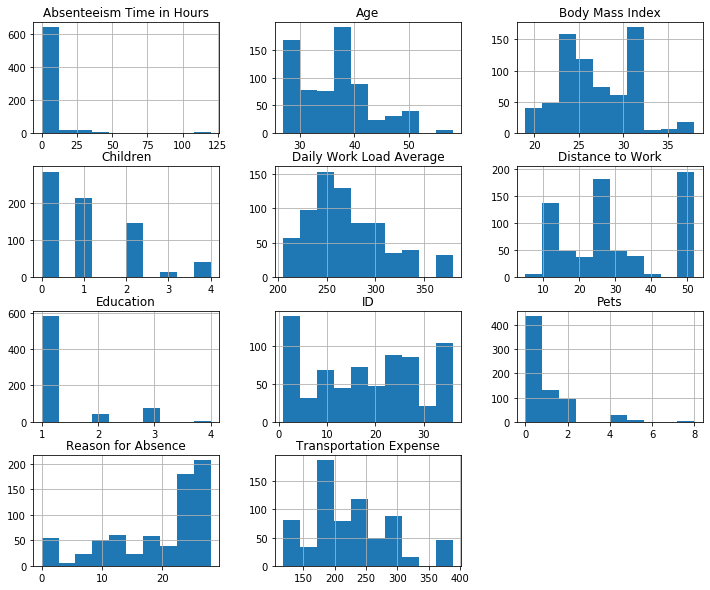

In [5]:
# Plotting the Histograms
df.hist(figsize=(12,10));

**Absenteeism Time in Hours**



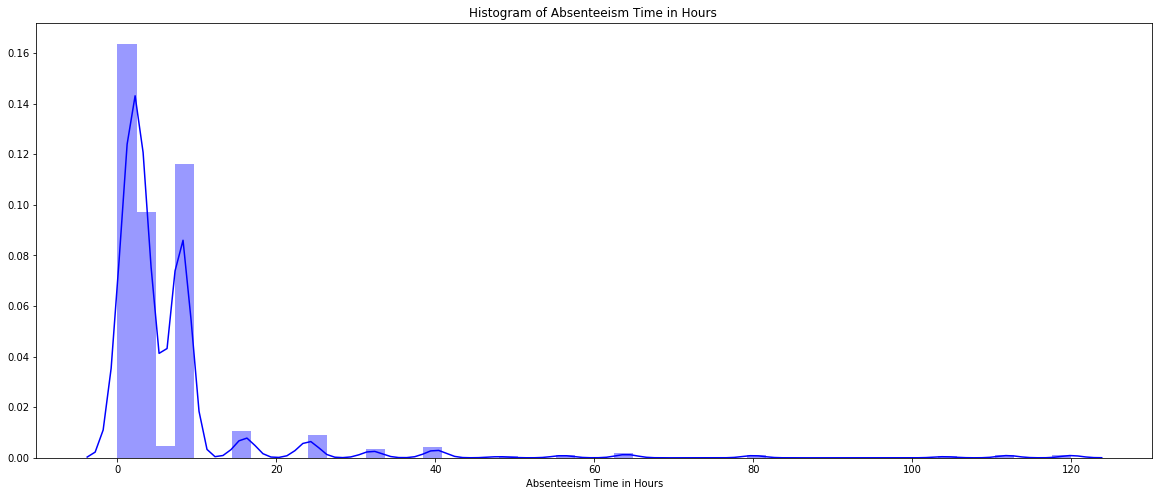

In [6]:
#Plotting the histogram for Absenteeism Time in Hours
plt.figure(figsize=(20,8));plt.title('Histogram of Absenteeism Time in Hours ')
sns.distplot(df['Absenteeism Time in Hours'], color='blue')
plt.show()

As we know that a regular working day at this company has 8 hours, any register of daily absence higher then this value makes no sense. Then, it`s necessary to deal with this values.

As we don`t a number of samples big enough, we are not going to drop those values. Instead, every value of absence higher than 8 hours is going to be replace by 8 hours, assuming that the employee has been out during the whole day.

In [0]:
# Creating a checkpoint
eda_df = df.copy()

In [0]:
# Replacing values >8 to 8 in 'Absence Time in Hours'
eda_df['Absenteeism Time in Hours'] = np.where(eda_df['Absenteeism Time in Hours'] > 8, 8, eda_df['Absenteeism Time in Hours'])

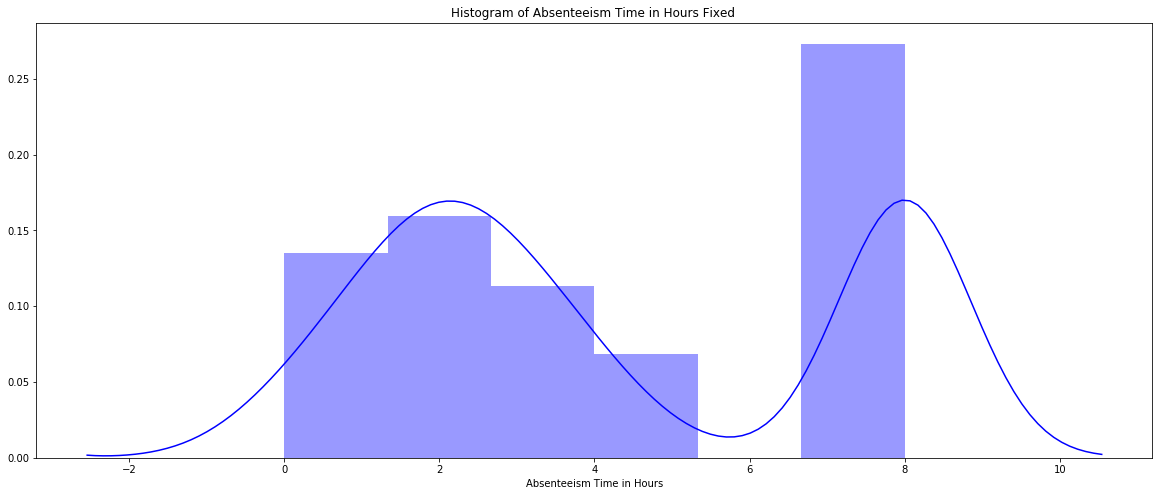

In [9]:
#Reploting the histogram
plt.figure(figsize=(20,8));plt.title('Histogram of Absenteeism Time in Hours Fixed ')
sns.distplot(eda_df['Absenteeism Time in Hours'], color='blue')
plt.show()

It`s also interesting to check the correlation of the independent features with the "Absenteeism Time in Hours":

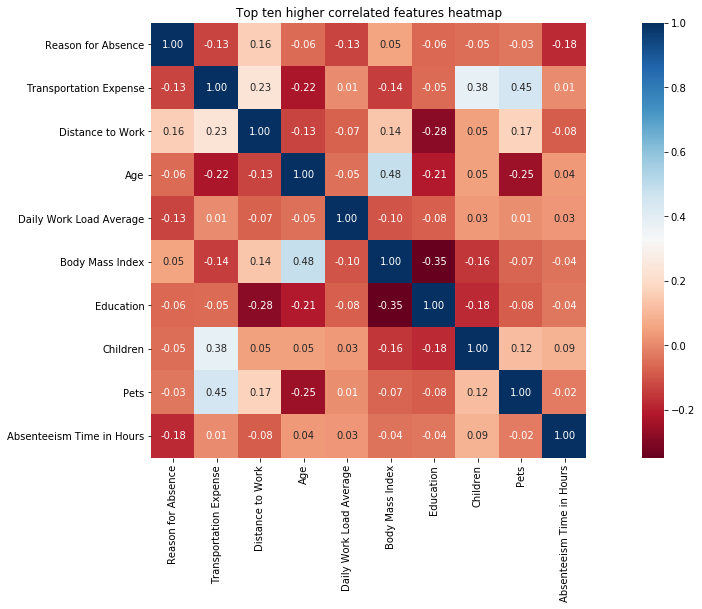

In [10]:
# Correlation Matrix
corr = df[quantitative].corr()

# Heatmap
plt.figure(figsize=(20,8));plt.title('Top ten higher correlated features heatmap')
sns.heatmap(data=corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)

As it is shown on the heatmap, any feature has a high correlation with the target, and also it sees that any of feature is strongly correlated between them.

**Absenteeism Time in Hours - Defining the target variable**

This is the feature we are going to use to build up the target variable for our model.

As the HR deparment would like to create a threshold to classify excessice absence, one can use the median value of the feature "Absenteeism Time in Hours" to derive the cut-off line. 

In this way, the dataset will be balanced ( there will be roughly equal number of 0s and 1s for the logistic regression).

Imbalanced datasets are a great problem  Machine Learning. Check this article on the TowardsDataScience to see how to handle this kind of datasets:

[Handling imbalanced datasets in machine learning](https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28)

In [11]:
# median value of 'Absenteeism Time in Hours'
abseent_median = eda_df['Absenteeism Time in Hours'].median()

# defining the target feature
target = np.where(eda_df['Absenteeism Time in Hours'] > abseent_median, 1, 0)

# checking if the dataset is indeed balanced
target.sum() / target.shape[0]

0.45571428571428574

45.5 % is close enough to the perfect balance (50%). Hence, we are going to foloow with this cut-off line.

In [0]:
# Adding up the target feature to the dataframe
eda_df['Excessive Absenteeism'] = target

# Dropping the feature 'Absenteeism Time in Hours', as the information included on it is now at the target feature
eda_df = eda_df.drop(['Absenteeism Time in Hours'],axis=1)

**Reasons for Absence**

Which is the most common reason for absence? And is there any relation to how much time the employee is absent?


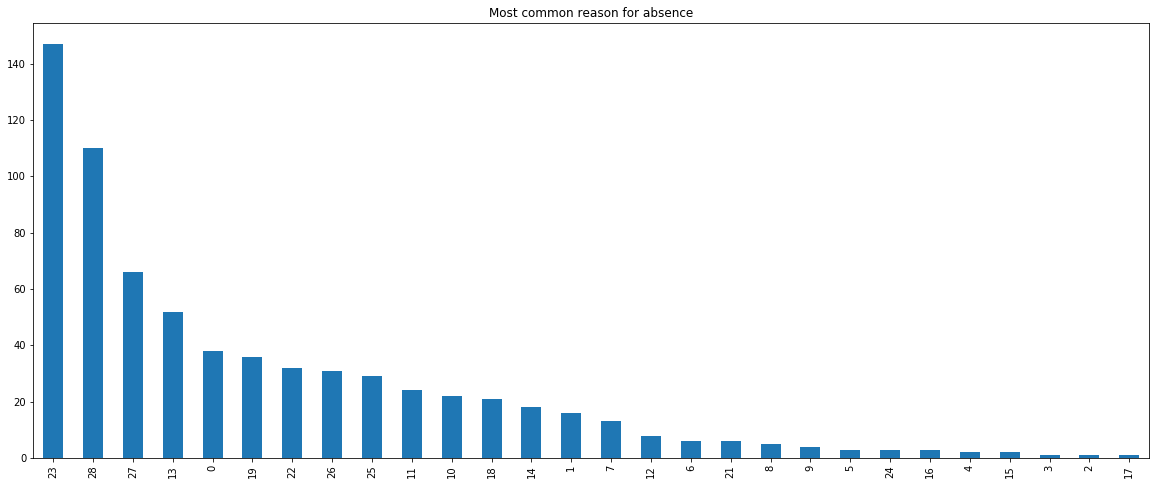

In [13]:
#Reploting the histogram
reason_absence = eda_df['Reason for Absence'].value_counts()
plt.figure(figsize=(20,8));plt.title('Most common reason for absence')
reason_absence.plot.bar()

As we can see in the bargraph above, the most common reasons for absence are:

1.   Medical Consultation (23)
2.   Dental consultations (28)
3.   Physiotherapy (27)
4.   Diseases of the musculosketal system and connective tissue (13)
5.   Reason were not yet declared (0)
6.   Injury, poisoning and certain other consequences of external causes (19)
7.   Patient follow-up (22)
8.   Unjustified absence (26)
9.   Labboratory examination (25)
10.   Diseases of the digestive system (11)

It`s not really surprising that most of the reason for absence are normal health procedures as visiting a doctor, dentist or a physiotherapist. 
Diseases of the digestive system and muscolosketal system were quite predictable as well, as food poisoning and repetitive strain injuries are common now a days.

What`s not so pleasent is that the have a significant amount of "0s", which means that the reason were not included on the database yet. As we don't want to keep it like that to our predictive model, one shall consider that reasons which were not yet included on the database (0) are Unjustified Absence (26):





In [0]:
# Replacing values =0 to 26 in 'Reason or Absence'
eda_df['Reason for Absence'] = np.where(eda_df['Reason for Absence'] == 0, 26, eda_df['Reason for Absence'])

In [0]:
excessive_absence = eda_df.groupby(['Reason for Absence','Excessive Absenteeism'])['Excessive Absenteeism'].count().unstack().fillna(0)

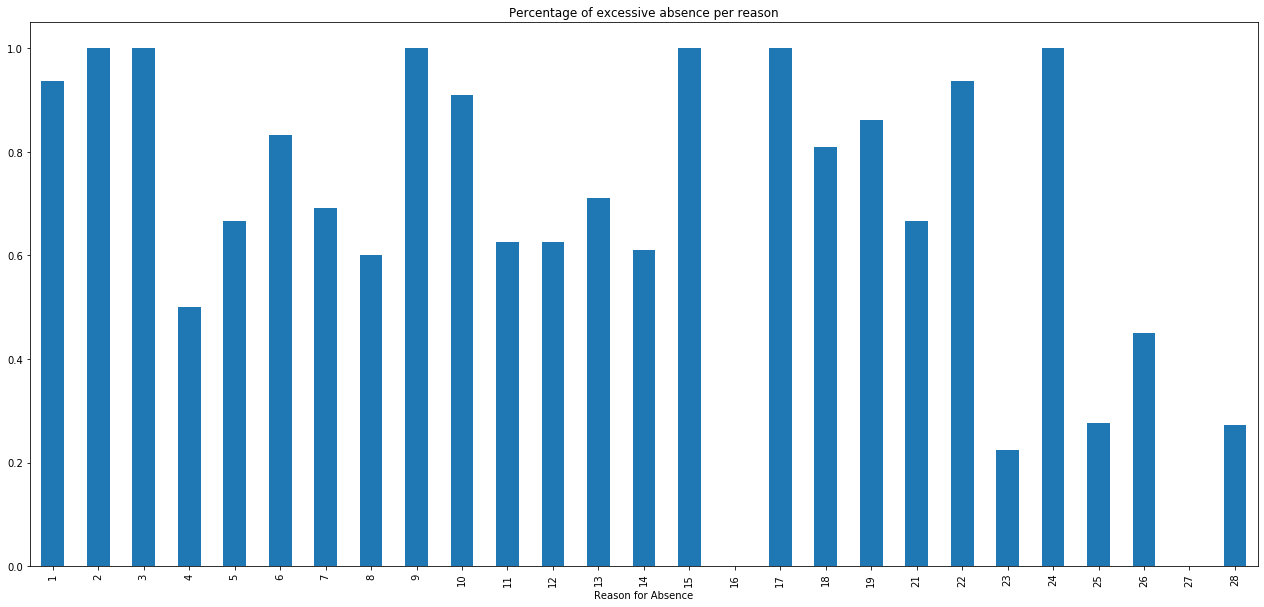

In [16]:
percent_excessive_absence = (excessive_absence[1] / (excessive_absence[1]+excessive_absence[0]))
plt.figure(figsize=(22,10));plt.title('Percentage of excessive absence per reason')
percent_excessive_absence.plot.bar()

In the bargraph above, one can see which reasons have more chance to end up in a absence higher then the defined cut-off value. 

Reasons which have a probability of excessive absence higher than 80% are:

*   Certain Infectious and parasitic diseases (1) - **93.8 %**
*   Neoplasms (2) - **100 %**
*   Diseases o thhe blood and blood-forming organs and certains (3) - **100% **
*   Diseases of the nervous system (6) - **83.3 %**
*   Diseases of the circulatory system (9) - **100 %**
*   Diseases of the respiratory system (10) - **90.9 %**
*   Pregnancy, childbbirth and the puerperium (15) - **100 %** 
*   Congenital malformations, deformations and chrosmosomal abnormalities (17) - **100 %**
*   Injury, poisoning and certain other consequences of external causes (19) - **86.1 %**
*   Patient follow-up (22) - **93.7 %**
*   Blood Donation (24) - **100 %**


Analyzing the five most common justified reasons for absence, we have:

*   Medical Consultation (23) - **22.5%**
*   Dental consultations (28) - **27.3%**
*   Physiotherapy (27) - **0%**
*   Diseases of the musculosketal system and connective tissue (13) - **71.2%**
*   Injury, poisoning and certain other consequences of external causes (19) - **86.1 %**







**Family**

Do the number of children and pets in the family have any relation with the frequency of excessive absenteeism?

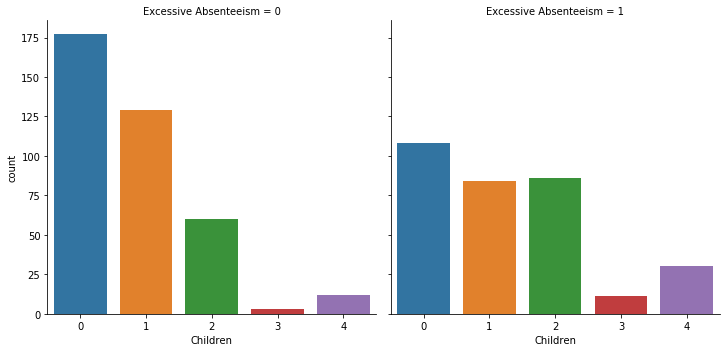

In [17]:
# Categorical plot for Children x Excessive Absenteeism

exc_abs_children = sns.catplot(x='Children',col='Excessive Absenteeism', data=eda_df, kind="count")

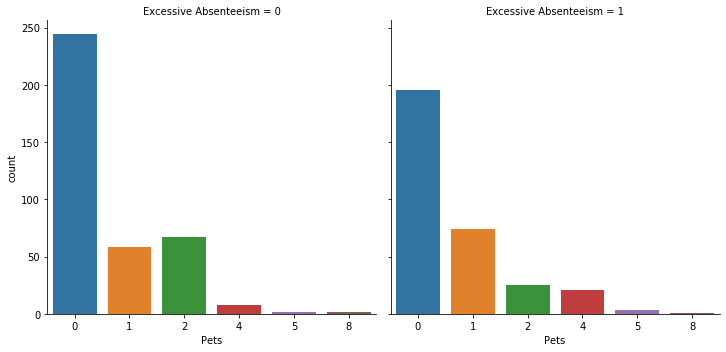

In [18]:
# Categorical plot for Pets x Excessive Absenteeism

exc_abs_pets = sns.catplot(x='Pets',col='Excessive Absenteeism', data=eda_df, kind="count")

It`s possible to see that the number of children and pets seems to have no direct influence in the employees' excessive abseenteeism at this company, as the shape of the bars are slightly the same for both possibilities of the feature "Excessive Absenteeism".

**Employee Physical Charactheristics**

We shall check now of the registered features related to the physical charactheristics (*age* and *body mass index*) of the employees have any impact at the frequency of excessice absenteeism:


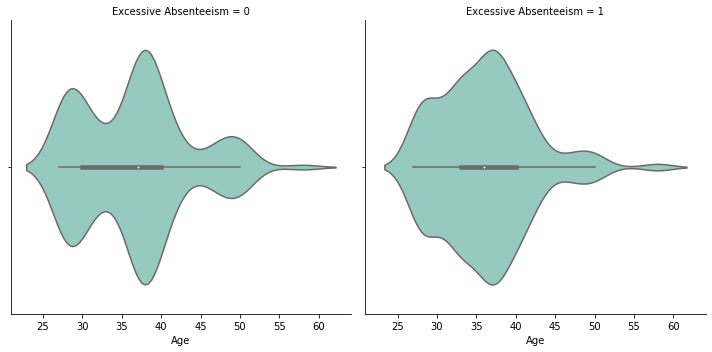

In [19]:
# Violin plot for Age x Excessive Absenteeism

exc_abs_age = sns.catplot(x='Age',col='Excessive Absenteeism', data=eda_df, kind="violin", palette="Set3")

It`s possible to see in the violin plots above that, besides the median values for both possibilities of the feature excessive absenteeism are slightly the same, the innerquartile range of "no excessive absenteeism" is longer to the left side.
Looking at the probability distribution, the biggest difference on the "violin" shape for both option is arround the age range of 30 to 35 years old. The graph shows us that employees at this range of age tend to be way more absent for a period of time higher than the defined threshold of 3 hours per day.

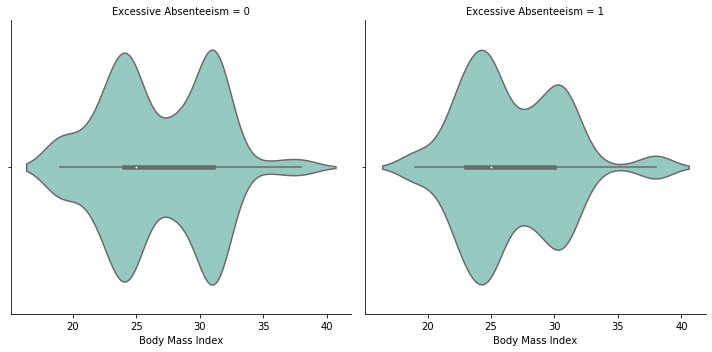

In [20]:
# Violin plot for Body Mass Index x Excessive Absenteeism

exc_abs_bmi_violin = sns.catplot(x='Body Mass Index',col='Excessive Absenteeism', data=eda_df, kind="violin", palette="Set3")

As we can see in the violin graphs above, the median and innerquartiles are way similar for both cases. However, there are differences in the probability density at some ranges of the body mass index.

There is a conventional definition of obesity classification based on the body mass index. Let`s map our feature according to it in order to analyze if obesity have any influence at excessive absenteeism at this company:

*Obesity Classification*

*(BMI = Body Mass Index)*

*   BMI < 18 - Underweight 
*   BMI >= 18 and < 25 - Normal 
*   BMI >= 25 and < 30 - Overweight 
*   BMI >= 30 and < 35 - Moderate Obesity 
*   BMI >= 35 and < 40 - Severe Obesity 
*   BMI >= 40 - Very Severe Obesity 


In [0]:
# Mapping the BMI feature according to the Obesity Classification
eda_df['Body Mass Index'] = eda_df['Body Mass Index'].apply(lambda x: 0 if x < 18 else
                                                             1 if (x >= 18 and x < 25) else
                                                             2 if (x >= 25 and x < 30) else
                                                             3 if (x >= 30 and x < 35) else
                                                             4 if (x >= 35 and x < 40) else
                                                             5)

In [0]:
# Mapping the Cathegories Names
eda_df['Body Mass Index'] = eda_df['Body Mass Index'].map({0 : 'Underweight',
                                                             1 : 'Normal',
                                                             2 : 'Overweight',
                                                             3 : 'Moderate Obesity',
                                                             4 : 'Severe Obesity',
                                                             5 : 'Very Severe Obesity'                                                        
                                                              })

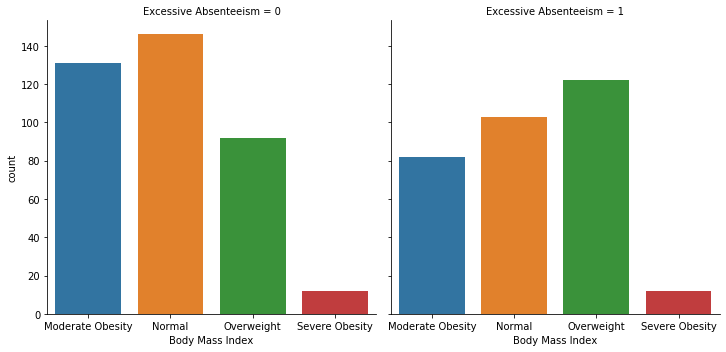

In [23]:
# Categorical plot for Obesity Classification x Excessive Absenteeism

exc_abs_obesity_cat = sns.catplot(x='Body Mass Index',col='Excessive Absenteeism', data=eda_df, kind="count")

As we could already see in the violin graph, the biggest differences are on the cathegories *Overweight* and *Moderate Obesity*.

*Overweight* employees seems to be more excessively absent, while the ones with *Moderate Obesety* and *Normal Weight* are in their majority more present at work.

*Severe Obesity* in the other hand seems to have no relation with excessive absenteeism.


It would be also interesting to understand how the age and body mass index are related at this company:



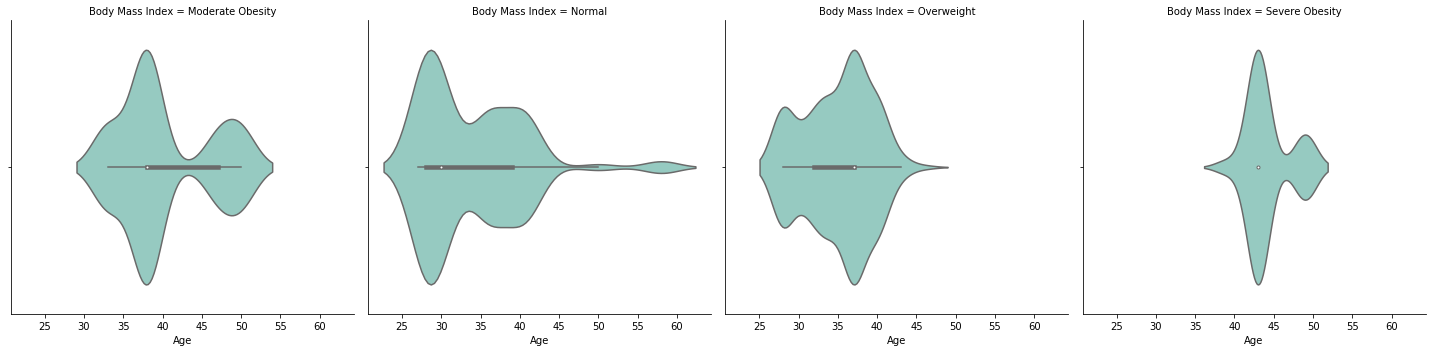

In [24]:
# Violin plot for Obesity Classification x Age

age_bmi_violin = sns.catplot(x='Age',col='Body Mass Index', data=eda_df, kind="violin", palette="Set3")

**Daily Work Load Average**

It`s possible to see in the violin graphs below that the employees that have a higher average daily work load have a higher probability of being excessively absent.

Besides the median being pretty much the same for both cases, the innerquartile of the positive case for excessive absenteeism is longer to the right.

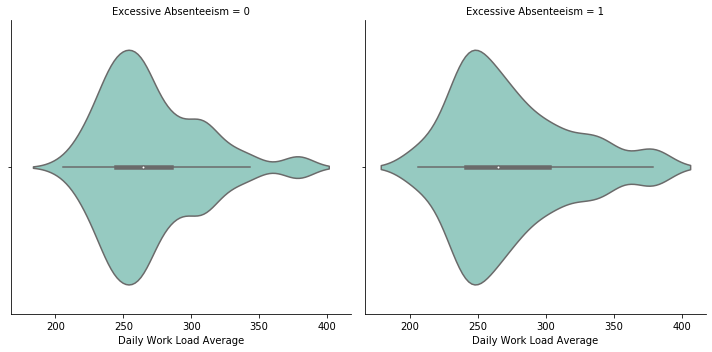

In [25]:
# Violin plot for Daily Work Average x Excessive Absenteeism

exc_abs_dwa_violin = sns.catplot(x='Daily Work Load Average',col='Excessive Absenteeism', data=eda_df, kind="violin", palette="Set3")

**Distance to Work and Transportation Expenses**

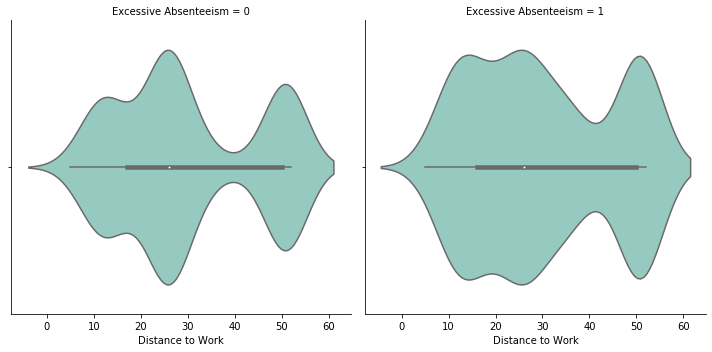

In [26]:
# Violin plot for Distance to Work x Excessive Absenteeism

exc_abs_dtw_violin = sns.catplot(x='Distance to Work',col='Excessive Absenteeism', data=eda_df, kind="violin", palette="Set3")

Here again, the median and innerquartiles are quite similar, but surpriselly, there`s a higher density of probability of employees which live pretty close to work ( distance < 20 km ) that are excessively absent.

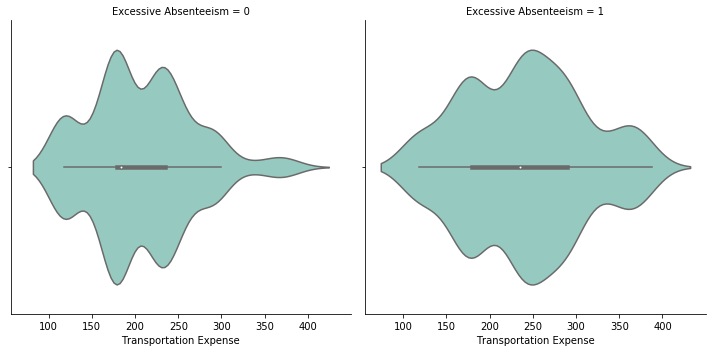

In [27]:
# Violin plot for Transportation Expenses x Excessive Absenteeism

exc_abs_texp_violin = sns.catplot(x='Transportation Expense',col='Excessive Absenteeism', data=eda_df, kind="violin", palette="Set3")

For transportation expenses in the other hand, there are no surprises. Clearly, employees that expend more money to get to work tend to be absent for more time, as it was expected.


However, how the distance to work affects the transportation costs at this particular city? Normally, it is expected to be a linear correlation, where one would expend more money as more distance needs to be traveled.

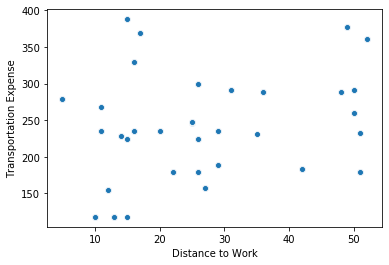

In [28]:
# Scatter plot for Transportation Expenses x Distance to Work

dtw_texp_scatter = sns.scatterplot(x='Distance to Work',y='Transportation Expense', data=eda_df, palette="Set3")

The scatter plot above show us that there`s no linear correlation between distance to work and transportation expenses.
As transportation expenses includes not only the cost with fuel and transportation tickets, but also parking and meals, there are many factors that could directly impact this feature, as per example which kind of restaurant the employees normally have their meals.

**Education**

The cathegorical plots below shows that employees with lower level of education tends to be more absent at work, either excessively or at the tolerated time limit stablished.


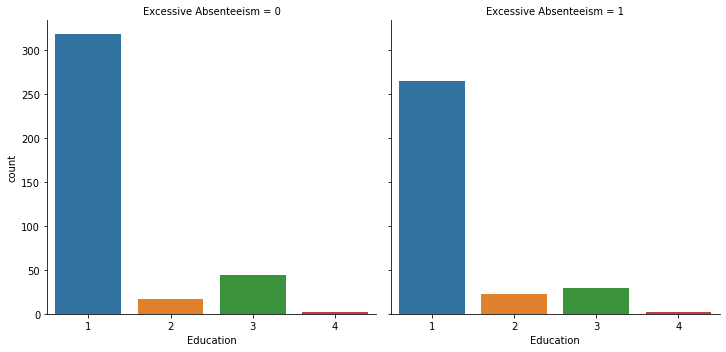

In [29]:
# Categorical plot for Education x Excessive Absenteeism

exc_abs_edu_cat = sns.catplot(x='Education',col='Excessive Absenteeism', data=eda_df, kind="count")

**Date**

Is there any month or maybe season of the year in which the excessive absenteeism is more common?

How about weekdays? Is it more common or a employee to be away from work on a monday, or by the end of the week?

In [0]:
# Convert Date from string to datetime
eda_df['Date'] = pd.to_datetime(eda_df['Date'], format = '%d/%m/%Y')

In [0]:
# Extract the Month from Date 

list_months = []
for i in range (eda_df.shape[0]):
  list_months.append(eda_df['Date'][i].month)

eda_df['Month of Absence'] = list_months

# Mapping the Months
eda_df['Month of Absence'] = eda_df['Month of Absence'].map({1 : 'january',
                                                             2 : 'february',
                                                             3 : 'march',
                                                             4 : 'april',
                                                             5 : 'may',
                                                             6 : 'june',
                                                             7 : 'july',
                                                             8 : 'august',
                                                             9 : 'september',
                                                             10 : 'october',
                                                             11 : 'november',
                                                             12 : 'december'                                                          
                                                              })

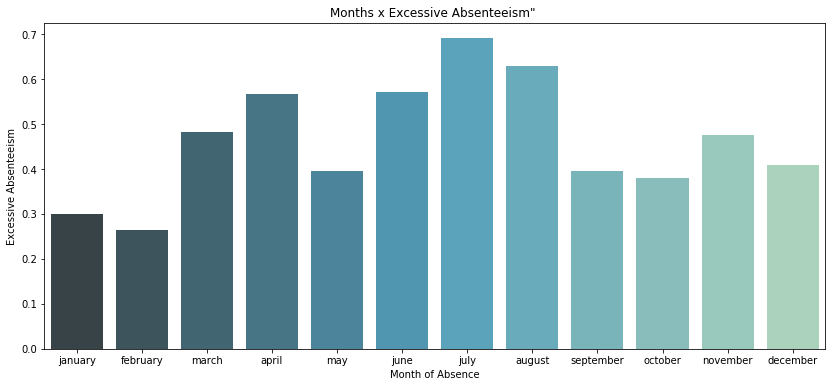

In [32]:
# Barplot months x excessive absenteeism
plt.figure(figsize=(14,6));plt.title('Months x Excessive Absenteeism" ')
sns.barplot(x='Month of Absence',y='Excessive Absenteeism',data=eda_df,ci=None,palette="GnBu_d", order = ["january","february","march","april","may","june","july","august","september","october","november","december"])
plt.show()

We can see in the graph above that excessive absenteeism is more common during the following months: april, june, july and august.

Interesting fact is the the **three months of summer** are included in the top list of higher absence.

In [0]:
# Extract the day of the week from Date

list_weekday = []
def date_to_weekday(date_value):
  return date_value.weekday()

eda_df['Weekday of Absence'] = eda_df['Date'].apply(date_to_weekday)

# Mapping Weekdays
eda_df['Weekday of Absence'] = eda_df['Weekday of Absence'].map({0 : 'monday',
                                                                 1 : 'tuesday',
                                                                 2 : 'wednesday',
                                                                 3 : 'thursday',
                                                                 4 : 'friday',
                                                                 5 : 'saturday',
                                                                 6 : 'sunday'})
                                                            


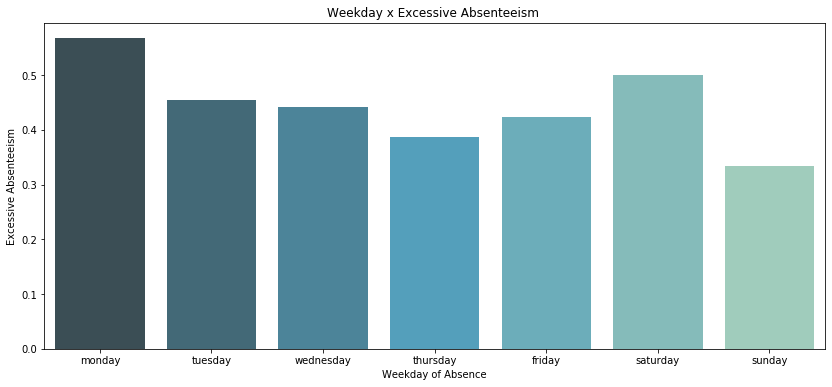

In [34]:
# Barplot weekday x excessive absenteeism
plt.figure(figsize=(14,6));plt.title('Weekday x Excessive Absenteeism ')
sns.barplot(x='Weekday of Absence',y='Excessive Absenteeism',data=eda_df,ci=None,palette="GnBu_d", order = ["monday","tuesday","wednesday","thursday","friday","saturday","sunday"])
plt.show()

On this other bargraph, one can see that this company have also working shifts during the weekends, and the most common weekdays of excessive absenteeism are **Monday** and **Saturday**, both with incidence higher the 50 %

# Section 4 - Data Preprocessing

**Feature Engineering**

There are some features that brought some interesting insights during the EDA step, but shall bring no value to our predictive model. I`m going to drop these ones:

*   Date
*   Weekday of Absence
*   Month of Absence
*   ID



In [0]:
# Creating a new checkpoint

preprocessing_df = eda_df.copy()

In [0]:
# Dropping the features

preprocessing_df.drop(['Date','Weekday of Absence','Month of Absence','ID'], axis=1, inplace=True)

The feature "Excessive Absenteeism" can also be dropped from the dataframe now, as it is our target variable and it`s information is already stored in the variable *target*

In [0]:
# Dropping Excessive Absenteeism

preprocessing_df.drop(['Excessive Absenteeism'], axis=1, inplace=True)

**Body Mass Index**

It is better to work with a numerical feature on our model, so we are going to use the Body Mass Index information from the original dataframe:

In [0]:
# Numeric Body Mass Index

preprocessing_df['Body Mass Index'] = df['Body Mass Index']

**Dummy Variables**

Let`s map our feature "Reasons or Absence" using dummy variables

In [0]:
# Preparing the Dummy Variables for 'Reason for Absence'

reasons_dummies = pd.get_dummies(preprocessing_df['Reason for Absence'], prefix='Reason for Absence', drop_first=True)
preprocessing_df = pd.concat([preprocessing_df, reasons_dummies], axis=1)
preprocessing_df.drop('Reason for Absence', axis=1, inplace=True)

**Education**

As we have seen during the EDA step that the highest relation with excessive absenteeism of employees and education level were the fact of having a higher degree or not, it makes sense to limit this feature to these two options:

*   0 -> High School
*   1 -> Higher Degree o Education



In [0]:
preprocessing_df['Education'] = preprocessing_df['Education'].apply(lambda x: 0 if x==1 else 1)

**Standardize the Data**

Standardization is one of the most common preprocessing tools since data of different magnitude (scale) can be biased towards high values,we want all inputs to be of similar magnitude.

a very useful module we can use is StandardScaler. It has much more capabilities than the straightforward 'preprocessing' method.

In [0]:
# Create a variable that will contain the inputs
unscaled_inputs = preprocessing_df.iloc[:,:]

In [0]:
# define scaler as an object
absenteeism_scaler = StandardScaler()


In [0]:
# create the Custom Scaler class

class CustomScaler(BaseEstimator,TransformerMixin): 
    
    # init or what information we need to declare a CustomScaler object
    # and what is calculated/declared as we do
    
    def __init__(self,columns,copy=True,with_mean=True,with_std=True):
        
        # scaler is nothing but a Standard Scaler object
        self.scaler = StandardScaler(copy,with_mean,with_std)
        # with some columns 'twist'
        self.columns = columns
        self.mean_ = None
        self.var_ = None
        
    
    # the fit method, which, again based on StandardScale
    
    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self
    
    # the transform method which does the actual scaling

    def transform(self, X, y=None, copy=None):
        
        # record the initial order of the columns
        init_col_order = X.columns
        
        # scale all features that you chose when creating the instance of the class
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)
        
        # declare a variable containing all information that was not scaled
        X_not_scaled = X.loc[:,~X.columns.isin(self.columns)]
        
        # return a data frame which contains all scaled features and all 'not scaled' features
        # use the original order (that you recorded in the beginning)
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]


In [0]:
# Select the columns to the standardization

columns_to_scale = ['Transportation Expense', 'Distance to Work', 'Age', 'Daily Work Load Average','Body Mass Index','Children','Pets']

# declare a scaler object, specifying the columns we want to scale
absenteeism_scaler = CustomScaler(columns_to_scale)

# fit the data (calculate mean and standard deviation); they are automatically stored inside the object 
absenteeism_scaler.fit(unscaled_inputs)

# standardizes the data, using the transform method 
scaled_inputs = absenteeism_scaler.transform(unscaled_inputs)


# Section 5 - Modeling

At this step, we are going to build up our logistic regression model:

**Train and Test Data**

First of all, it`s necessary to shuffle and split our data into test and train sets, in order to enable an evalutation to the built model:

In [0]:
#Splitting and shuffling our train test into two: train e test sets

X_train, X_test, y_train, y_test = train_test_split(
    scaled_inputs, target, test_size=0.1, random_state = 20)

**Logistic Regression Model**

Here I`m going to create a logistic regression object and fit the train inputs into the model.

After that, I`m going to check the train accuracy of the model and get the intercept and coefficients, and then calculate the odds ratio of each feature:

[Odds Ratio Explained](https://en.wikipedia.org/wiki/Odds_ratio)

In [50]:
# Creating a logistic regression object

log_reg = LogisticRegression()

# fit our train inputs

log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
# checking the accuracy with train data

acc_logReg_train = round(log_reg.score(X_train, y_train) * 100, 2)
print("Training Accuracy of the Logistic Regression Model: {} %".format(acc_logReg_train))

Training Accuracy of the Logistic Regression Model: 78.89 %


Our model had **78.9 %** of accuracy during the training phase.

In [59]:
# save the names of the columns in an ad-hoc variable
feature_name = unscaled_inputs.columns.values

summary_table = pd.DataFrame (columns=['Feature name'], data = feature_name)

# add the coefficient values to the summary table
summary_table['Coefficient'] = np.transpose(log_reg.coef_)

# create a new Series called: 'Odds ratio' which will show the.. odds ratio of each feature
summary_table['Odds_ratio'] = np.exp(summary_table.Coefficient)

# sort the table according to odds ratio
summary_table.sort_values('Odds_ratio', ascending=False)

# display the summary table
summary_table


,Feature name,Coefficient,Odds_ratio
0,Transportation Expense,0.427804,1.533885
1,Distance to Work,0.072402,1.075087
2,Age,-0.251382,0.777725
3,Daily Work Load Average,-0.019112,0.981070
4,Body Mass Index,0.239285,1.270340
5,Education,-0.299185,0.741422
6,Children,0.235577,1.265639
7,Pets,-0.434394,0.647657
8,Reason for Absence_2,0.165464,1.179941
9,Reason for Absence_3,0.240456,1.271829


# Section 6 - Testing the model


In [68]:
# checking the accuracy using test data

acc_logReg = round(log_reg.score(X_test, y_test) * 100, 2)
print("Accuracy of the Logistic Regression Model: {} %".format(acc_logReg))

Accuracy of the Logistic Regression Model: 75.71 %


In [66]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

y_hat = log_reg.predict(X_test)

confusion_matrix(y_test, y_hat, labels=None, sample_weight=None, normalize= 'true')

array([[0.74193548, 0.25806452],
       [0.23076923, 0.76923077]])

**Results**

*   78.89 % of accuracy with the test data;
*   75.71 % of accuracy with the test data;

